# **TP Supervised Learning Review**
----

In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time, random 
import itertools

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier as KNNs
from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, zero_one_loss


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """
    This function plots the confusion matrix of classfier
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **0. Load dataset**

### Load MNIST dataset

In [0]:
# import data
mnist = fetch_openml('mnist_784')

In [4]:
images = mnist.data.reshape((-1,28,28))
data = mnist.data / 255.
target = mnist.target
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of target : ", target.shape)

Shape of training images :  (70000, 28, 28)
Shape of training data :  (70000, 784)
Shape of target :  (70000,)


In [5]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Split training & test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,target,train_size =60000)

# X_train, y_train = X_train[:500], y_train[:500]
# X_test, y_test = X_test[:500], y_test[:500]

print("Traning data shape : ", X_train.shape)
print("Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Traning data shape :  (60000, 784)
Traning target shape :  (60000,)
Testing data shape :  (10000, 784)
Testing target shape :  (10000,)


## **1. Training with : KNN, MLP, SVM  and  Comparison**

In [0]:
test_scores = []
training_times = []
predict_times = []

Start training...
Training time :  10.437930999999935
Test accuracy :  0.9712
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       958
           1       0.96      0.99      0.98      1143
           2       0.98      0.97      0.97      1038
           3       0.96      0.97      0.96      1032
           4       0.98      0.97      0.97       985
           5       0.97      0.95      0.96       916
           6       0.98      0.99      0.98       969
           7       0.96      0.98      0.97      1010
           8       0.99      0.93      0.96       944
           9       0.96      0.96      0.96      1005

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     1

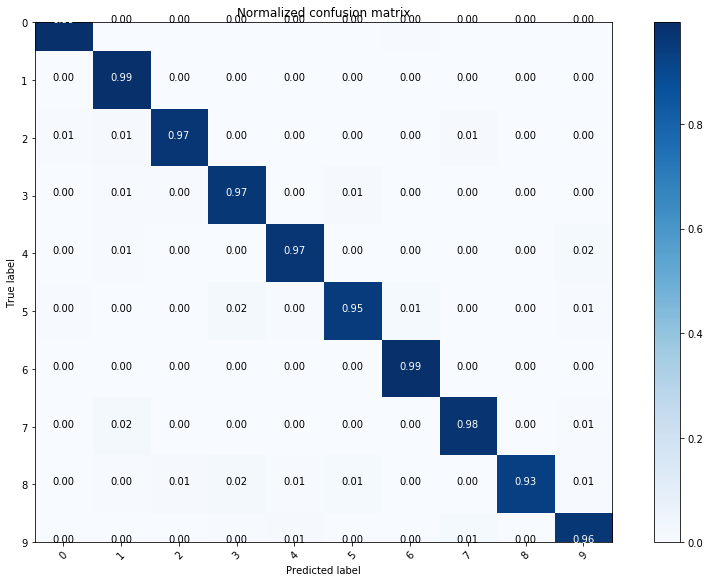

CPU times: user 38min 23s, sys: 814 ms, total: 38min 24s
Wall time: 19min 31s


In [11]:
%%time
knn = KNNs(n_neighbors=3,n_jobs=-1)
print('Start training...')
start = time.clock()
knn.fit(X_train,y_train)
exec_time = time.clock() - start
training_times.append(exec_time)
print('Training time : ',exec_time)

test_score = knn.score(X_test,y_test)
test_scores.append(test_score)
print("Test accuracy : ",test_score)

start= time.clock()
y_pred = knn.predict(X_test)
predict_times.append(time.clock()-start)

print("Classification report for classifier %s:\n%s\n" % (knn, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Start training...
Training time :  208.0940299999993
Test accuracy :  0.9746
Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       958
           1       0.98      0.99      0.99      1143
           2       0.97      0.98      0.98      1038
           3       0.97      0.97      0.97      1032
           4       0.98      0.97      0.98       985
           5       0.97      0.96      0.97       916
       

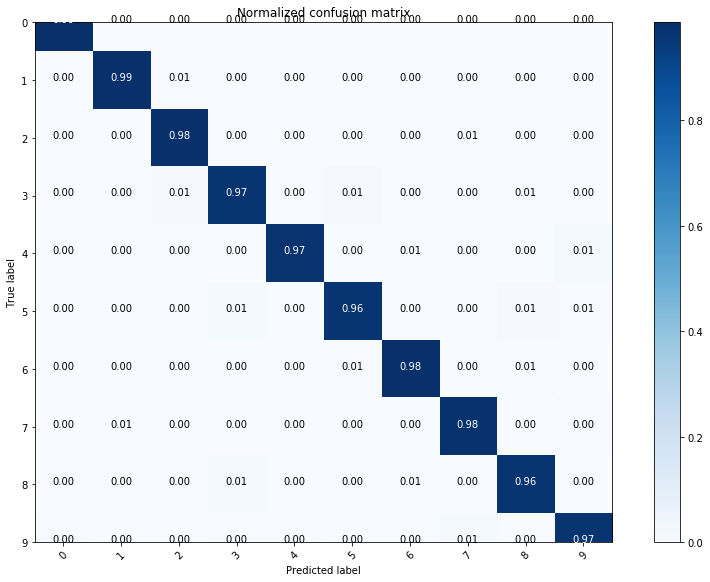

CPU times: user 2min 25s, sys: 1min 4s, total: 3min 29s
Wall time: 1min 46s


In [12]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50),solver='adam',activation='relu',verbose=0)
print('Start training...')
start = time.clock()
mlp.fit(X_train,y_train)
exec_time = time.clock() - start
training_times.append(exec_time)
print('Training time : ',exec_time)

test_score = mlp.score(X_test,y_test)
test_scores.append(test_score)
print("Test accuracy : ",test_score)

start = time.clock()
y_pred = mlp.predict(X_test)
predict_times.append(time.clock()-start)

print("Classification report for classifier %s:\n%s\n" % (mlp, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Start training...


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Training time :  234.46640000000025
Test accuracy :  0.8104
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=500, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       958
           1       0.89      0.95      0.92      1143
           2       0.81      0.81      0.81      1038
           3       0.70      0.75      0.72      1032
           4       0.77      0.83      0.80       985
           5       0.73      0.70      0.71       916
           6       0.95      0.91      0.93       969
           7       0.89      0.83      0.86      1010
           8       0.74      0.64      0.69       944
           9       0.71      0.70      0.71      1005

    accuracy                           0.81     10000
   mac

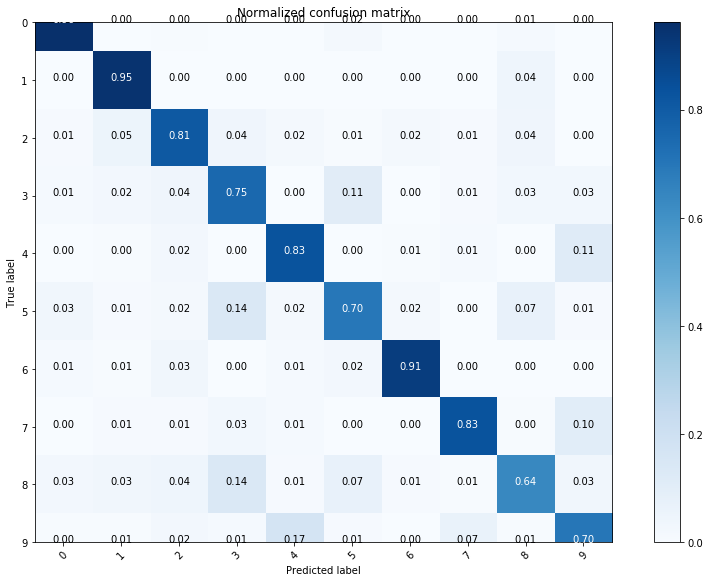

CPU times: user 7min 16s, sys: 210 ms, total: 7min 16s
Wall time: 7min 16s


In [13]:
%%time
svc = SVC(kernel='linear',max_iter =500)
print('Start training...')
start = time.clock()
svc.fit(X_train,y_train)
exec_time = time.clock() - start
training_times.append(exec_time)
print('Training time : ',exec_time)

test_score = svc.score(X_test,y_test)
test_scores.append(test_score)
print("Test accuracy : ",test_score)

start = time.clock()
y_pred = svc.predict(X_test)
predict_times.append(time.clock()-start)

print("Classification report for classifier %s:\n%s\n" % (svc, classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes=target_list, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

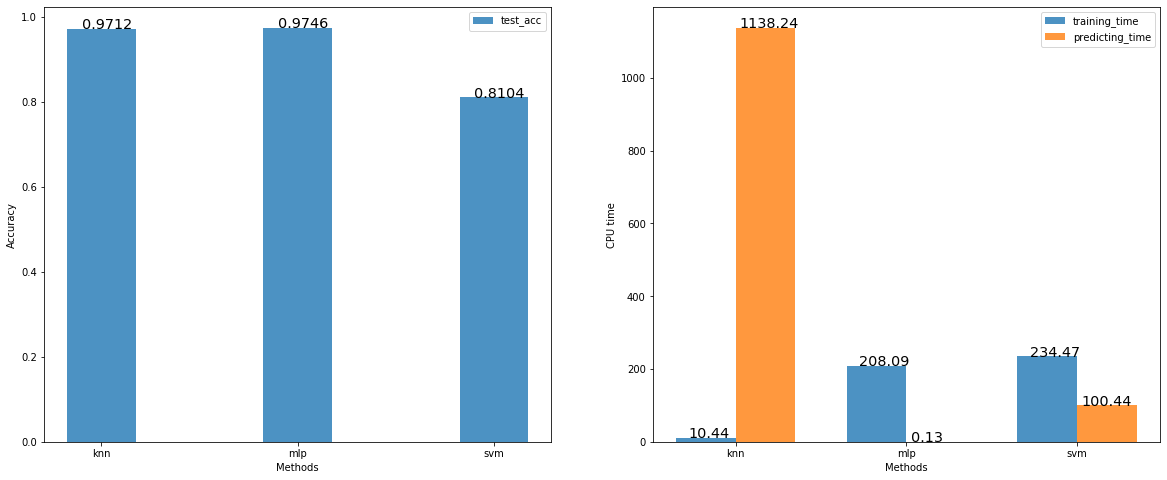

<Figure size 432x288 with 0 Axes>

In [41]:
methods = ('knn', 'mlp', 'svm')
y_pos = np.arange(len(methods))
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(20,8))

plt.subplot(121)
plt.bar(y_pos,test_scores,bar_width,align='center',alpha=opacity,label='test_acc')
for i, txt in enumerate(test_scores):
    plt.annotate(txt, (i-0.1, test_scores[i]),fontsize='x-large')
plt.xticks(y_pos,methods)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(122)
plt.bar(y_pos,training_times,bar_width,align='center',alpha=opacity,label='training_time')
plt.bar(y_pos+bar_width,predict_times,bar_width,align='center',alpha=opacity,label='predicting_time')
for i, txt in enumerate(training_times):
    plt.annotate(round(txt,2), (i-0.1, training_times[i]),fontsize='x-large')
for i, txt in enumerate(predict_times):
    plt.annotate(round(txt,2), (i+0.2, predict_times[i]),fontsize='x-large')
plt.xticks(y_pos+bar_width/2,methods)
plt.xlabel('Methods')
plt.ylabel('CPU time')
plt.legend()

plt.show()
plt.savefig("TP3-acc-time.png")

## **2. Accuracy vs. Execution Time Graph**

In [0]:
%%time 
knn_test_scores, knn_training_times = [], []

neighbors_settings = np.array([1,3,10])
for k in neighbors_settings : 
    knn = KNNs(n_neighbors=k,n_jobs=-1)
    start = time.clock()
    knn.fit(X_train,y_train)
    exec_time = time.clock() - start
    knn_training_times.append(exec_time)
    knn_test_scores.append(knn.score(X_test,y_test))

CPU times: user 59min 36s, sys: 1.97 s, total: 59min 38s
Wall time: 30min 27s


In [0]:
%%time 
mlp_test_scores, mlp_training_times = [], []

layers_settings = np.array([1,3,10])
for k in layers_settings: 
    layers = (50,) * k
    mlp = MLPClassifier(hidden_layer_sizes=layers,solver='adam',activation='relu',verbose=0,max_iter=300)
    mlp.fit(X_train,y_train)
    exec_time = time.clock() - start
    mlp_training_times.append(exec_time)
    mlp_test_scores.append(mlp.score(X_test,y_test))

CPU times: user 10min 59s, sys: 4min 50s, total: 15min 50s
Wall time: 8min 1s


In [0]:
%%time 
svm_test_scores, svm_training_times = [], []

kernel_settings = ['linear','poly','rbf']
for k in kernel_settings: 
    svc = SVC(kernel=k, max_iter=300)
    start = time.clock()
    svc.fit(X_train,y_train)
    exec_time = time.clock() - start
    svm_training_times.append(exec_time)
    svm_test_scores.append(svc.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

CPU times: user 20min 16s, sys: 376 ms, total: 20min 16s
Wall time: 20min 17s


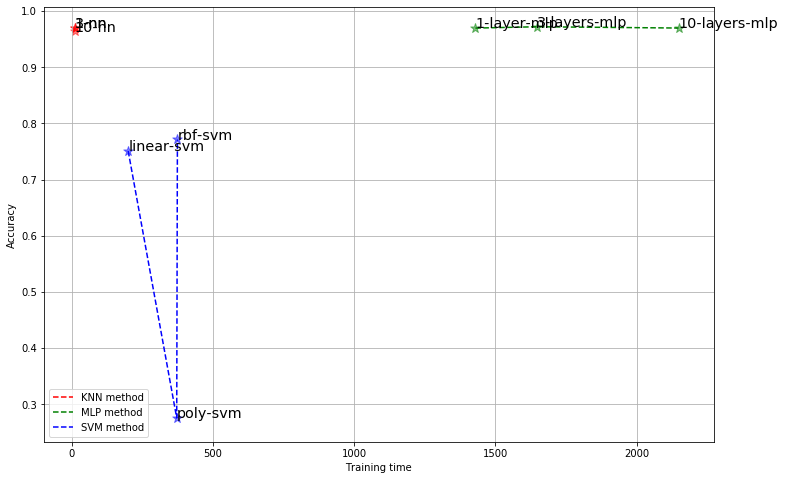

<Figure size 432x288 with 0 Axes>

In [0]:
ecart = 0.0001
plt.figure(figsize=(12,8))
plt.plot(knn_training_times,knn_test_scores,'r--',label='KNN method')
plt.scatter(knn_training_times,knn_test_scores,marker='*',c='r',s=100,alpha=0.5)
knn_names = ['1-nn','3-nn','10-nn']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (knn_training_times[i]+ecart, knn_test_scores[i]+ecart),fontsize='x-large')

plt.plot(mlp_training_times,mlp_test_scores,'g--',label='MLP method')
plt.scatter(mlp_training_times,mlp_test_scores,marker='*',c='g',s=100,alpha=0.5)
knn_names = ['1-layer-mlp','3-layers-mlp','10-layers-mlp']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (mlp_training_times[i]+ecart, mlp_test_scores[i]+ecart),fontsize='x-large')

plt.plot(svm_training_times,svm_test_scores,'b--',label='SVM method')
plt.scatter(svm_training_times,svm_test_scores,marker='*',c='b',s=100,alpha=0.5)
knn_names = ['linear-svm','poly-svm','rbf-svm']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (svm_training_times[i]+ecart, svm_test_scores[i]+ecart),fontsize='x-large')

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.savefig("TP3-acc-vs-time-3.png")

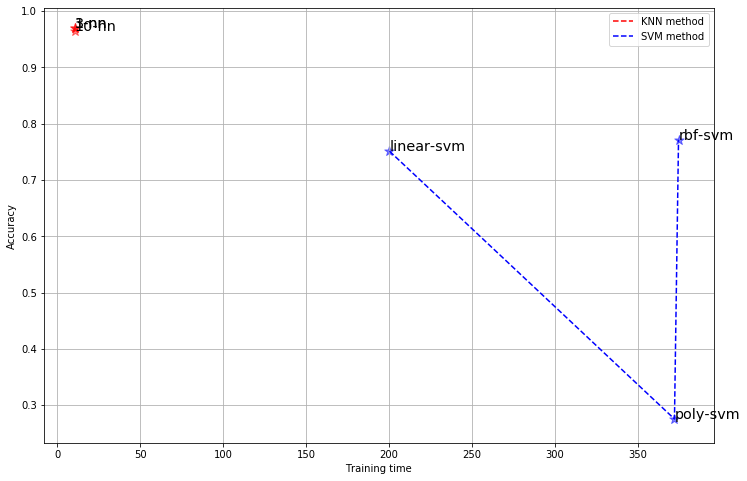

<Figure size 432x288 with 0 Axes>

In [0]:
ecart = 0.0001
plt.figure(figsize=(12,8))
plt.plot(knn_training_times,knn_test_scores,'r--',label='KNN method')
plt.scatter(knn_training_times,knn_test_scores,marker='*',c='r',s=100,alpha=0.5)
knn_names = ['1-nn','3-nn','10-nn']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (knn_training_times[i]+ecart, knn_test_scores[i]+ecart),fontsize='x-large')

# plt.plot(mlp_training_times,mlp_test_scores,'g--',label='MLP method')
# plt.scatter(mlp_training_times,mlp_test_scores,marker='*',c='g',s=100,alpha=0.5)
# knn_names = ['1-layer-mlp','3-layers-mlp','10-layers-mlp']
# for i, txt in enumerate(knn_names):
#     plt.annotate(txt, (mlp_training_times[i]+ecart, mlp_test_scores[i]+ecart),fontsize='x-large')

plt.plot(svm_training_times,svm_test_scores,'b--',label='SVM method')
plt.scatter(svm_training_times,svm_test_scores,marker='*',c='b',s=100,alpha=0.5)
knn_names = ['linear-svm','poly-svm','rbf-svm']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (svm_training_times[i]+ecart, svm_test_scores[i]+ecart),fontsize='x-large')

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.savefig("TP3-acc-vs-time-2.png")

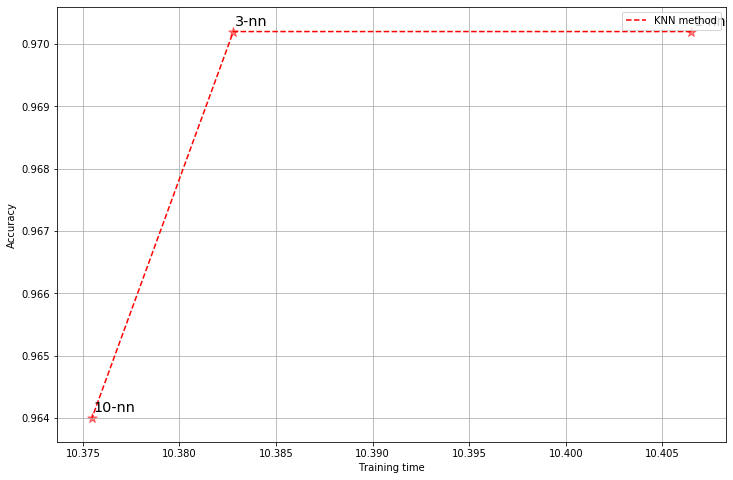

<Figure size 432x288 with 0 Axes>

In [0]:
ecart = 0.0001
plt.figure(figsize=(12,8))
plt.plot(knn_training_times,knn_test_scores,'r--',label='KNN method')
plt.scatter(knn_training_times,knn_test_scores,marker='*',c='r',s=100,alpha=0.5)
knn_names = ['1-nn','3-nn','10-nn']
for i, txt in enumerate(knn_names):
    plt.annotate(txt, (knn_training_times[i]+ecart, knn_test_scores[i]+ecart),fontsize='x-large')

# plt.plot(mlp_training_times,mlp_test_scores,'g--',label='MLP method')
# plt.scatter(mlp_training_times,mlp_test_scores,marker='*',c='g',s=100,alpha=0.5)
# knn_names = ['1-layer-mlp','3-layers-mlp','10-layers-mlp']
# for i, txt in enumerate(knn_names):
#     plt.annotate(txt, (mlp_training_times[i]+ecart, mlp_test_scores[i]+ecart),fontsize='x-large')

# plt.plot(svm_training_times,svm_test_scores,'b--',label='SVM method')
# plt.scatter(svm_training_times,svm_test_scores,marker='*',c='b',s=100,alpha=0.5)
# knn_names = ['linear-svm','poly-svm','rbf-svm']
# for i, txt in enumerate(knn_names):
#     plt.annotate(txt, (svm_training_times[i]+ecart, svm_test_scores[i]+ecart),fontsize='x-large')

plt.xlabel('Training time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
plt.savefig("TP3-acc-vs-time-1.png")

----